In [35]:
! pip install geopandas
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('../Data/Presences_Absences_Train.xlsx')

In [4]:
df

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
0,5140269,3.473385e+09,(IGN),Inventaire forestier IGN,2018-01-31 00:00:00,31,2018,7.300790,48.29273,4.120673e+06,2.801353e+06,1.0,6574,3018575,3980325
1,5279421,3.474159e+09,(IGN),Inventaire forestier IGN,2017-07-19 00:00:00,200,2017,1.483390,42.92599,3.625340e+06,2.241565e+06,1.0,6574,3011783,3980331
2,5058088,3.475680e+09,(IGN),Inventaire forestier IGN,2017-09-26 00:00:00,269,2017,6.739570,47.39633,4.074778e+06,2.703502e+06,1.0,6574,3018192,3980335
3,5146840,3.476162e+09,(IGN),Inventaire forestier IGN,2017-09-20 00:00:00,263,2017,4.587140,45.40615,3.897015e+06,2.492494e+06,1.0,6574,3015541,3980336
4,5255062,3.475124e+09,(IGN),Inventaire forestier IGN,2019-09-18 00:00:00,261,2019,6.955830,47.74829,4.092660e+06,2.741886e+06,1.0,6574,3018391,3980351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85320,5320539,NaN,NaN,CBNMed,1621461600,140,2021,5.094570,44.18660,3.928254e+06,2.354689e+06,10.0,9456,76900,3993145
85321,5392608,NaN,NaN,CBNMed,1497909600,171,2017,5.781197,43.74345,3.980545e+06,2.302273e+06,10.0,9456,94452,3986894
85322,5353058,NaN,NaN,CBNMed,1621461600,140,2021,5.094620,44.18680,3.928259e+06,2.354711e+06,10.0,9456,76905,3993923
85323,5102872,2.907311e+09,"Shoesmith, J. Judith",Nat. plant monitoring UK,2017-06-07 00:00:00,158,2017,0.785642,51.70740,3.686016e+06,3.217623e+06,7.1,6081,3010687,3990777


In [6]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)

In [7]:
#nombre d'especes differentes 
unique_values_count = df['speciesId'].nunique()
print(unique_values_count)

2174


In [25]:
#idespece classées par nombres de recencements
counts = df.groupby('speciesId').size()
counts = counts.sort_values(ascending=False)
print(counts)

speciesId
4284    1925
8935    1885
5959    1564
386     1182
5314    1023
        ... 
4077       1
4082       1
8343       1
4137       1
5189       1
Length: 2174, dtype: int64


<AxesSubplot:title={'center':'Ensemble des observations du jeu "presence-absence train"'}>

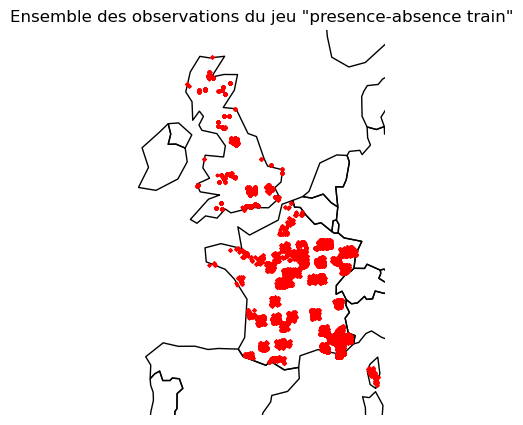

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
xmin, xmax, ymin, ymax = -10, 10, 40, 60

# Créez le tracé restreint en utilisant les limites spécifiées
ax = world.plot(figsize=(5,5), color='none')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_title('Ensemble des observations du jeu "presence-absence train"')
# Enlevez l'affichage des axes
ax.set_axis_off()

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")
gdf.plot(ax=ax, color='red', markersize=2)

<AxesSubplot:title={'center':'Ensemble des observations du jeu "presence-absence train"'}>

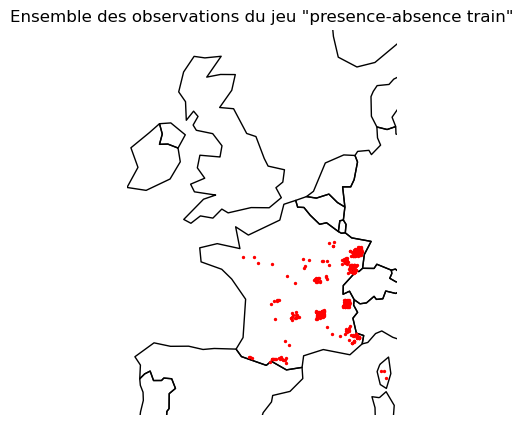

In [20]:
masque = df.speciesId == 6574
df6574 = df[masque]
#gdf.plot()
ax = world.plot(figsize=(5,5), color='none')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_title('Ensemble des observations du jeu "presence-absence train"')
# Enlevez l'affichage des axes
ax.set_axis_off()

gdf = gpd.GeoDataFrame(df6574, geometry=gpd.points_from_xy(df6574.lon, df6574.lat), crs="EPSG:4326")
gdf.plot(ax=ax, color='red', markersize=2)

<AxesSubplot:title={'center':'Ensemble des observations du jeu "presence-absence train"'}>

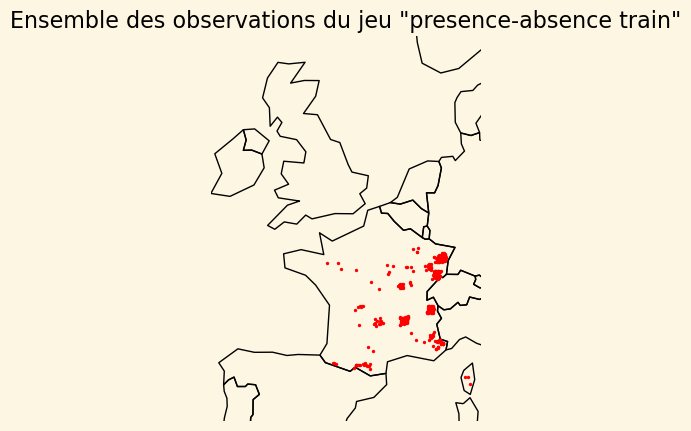

In [38]:
ax = world.plot(figsize=(5,5), color='none')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_title('Ensemble des observations du jeu "presence-absence train"')
# Enlevez l'affichage des axes
ax.set_axis_off()

gdf = gpd.GeoDataFrame(df6574, geometry=gpd.points_from_xy(df6574.lon, df6574.lat), crs="EPSG:4326")
gdf.plot(ax=ax, color='red', markersize=2)

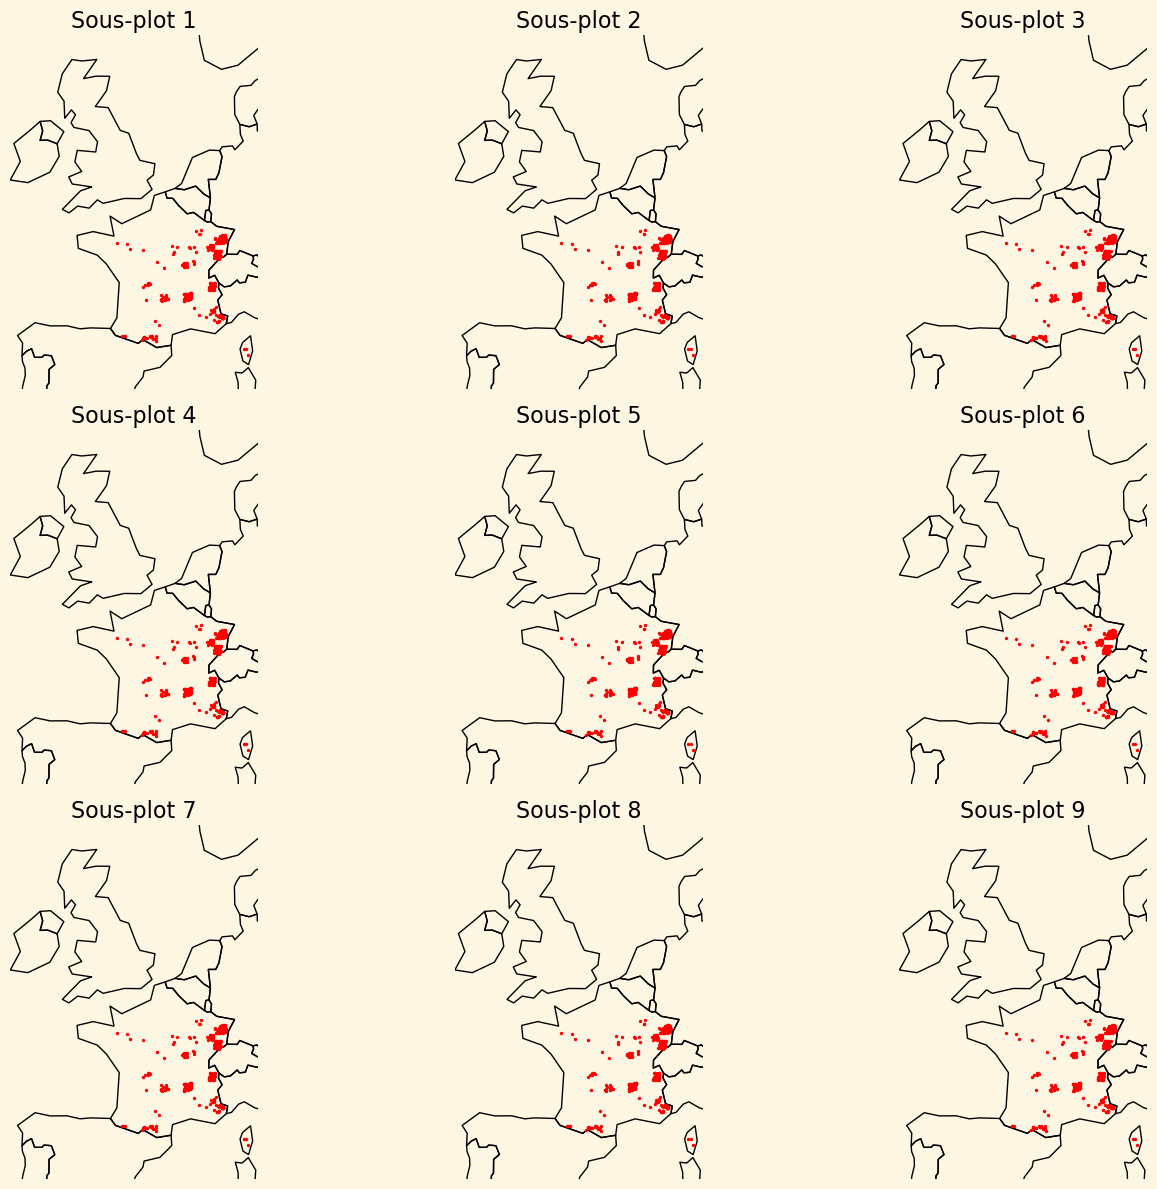

In [46]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Supposez que vous ayez déjà chargé vos données GeoPandas 'world' et 'df6574'
# Assurez-vous que xmin, xmax, ymin, ymax sont définis

# Créez une figure avec plusieurs sous-graphiques
fig = plt.figure(figsize=(15, 12))  # Augmentez la taille de la figure si nécessaire
for i in range(9):
    # Ajoutez un sous-graphique à la figure
    ax = fig.add_subplot(3, 3, i + 1)  # 3 lignes, 3 colonnes
    
    # Configurez la carte GeoPandas 'world'
    world_ax = world.plot(ax=ax, figsize=(5, 5), color='none')
    world_ax.set_xlim(xmin, xmax)
    world_ax.set_ylim(ymin, ymax)
    world_ax.set_title('Sous-plot {}'.format(i+1))
    world_ax.set_axis_off()
    
    # Créez une GeoDataFrame à partir de vos données 'df6574'
    gdf = gpd.GeoDataFrame(df6574, geometry=gpd.points_from_xy(df6574.lon, df6574.lat), crs="EPSG:4326")
    
    # Tracez les points sur la carte GeoPandas 'world'
    gdf.plot(ax=world_ax, color='red', markersize=2)

# Réglez la mise en page des sous-graphiques
plt.tight_layout()

# Affichez la figure
plt.show()
